In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Renaming cols
df.rename(columns= {'v1': 'Target','v2':'Text'},inplace = True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['Target'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lr = LabelEncoder()

In [13]:
df['Target'] = lr.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
#Remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

EDA

In [20]:
(df['Target'].value_counts()/len(df))*100

0    87.366996
1    12.633004
Name: Target, dtype: float64

In [21]:
import matplotlib.pyplot as plt

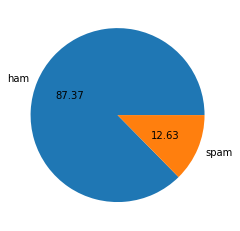

In [22]:
plt.pie(df['Target'].value_counts(),labels= ['ham','spam'],autopct = "%0.2f")
plt.show()

In [23]:
#Data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['Text'].apply(len)

In [27]:
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<AxesSubplot:>

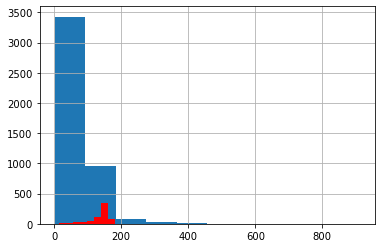

In [35]:
df[df['Target'] == 0]['num_characters'].hist()
df[df['Target'] == 1]['num_characters'].hist(color='red')

<AxesSubplot:>

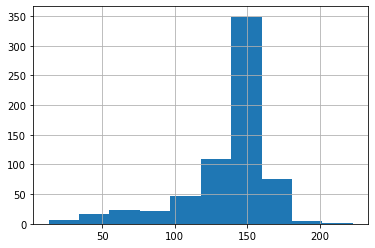

In [36]:
df[df['Target'] == 1]['num_characters'].hist()

<AxesSubplot:>

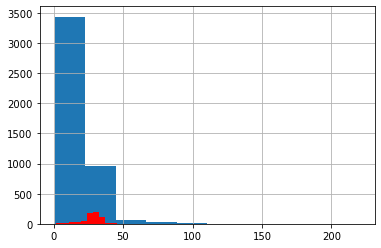

In [37]:
df[df['Target'] == 0]['num_words'].hist()
df[df['Target'] == 1]['num_words'].hist(color='red')

In [38]:
df.corr()

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


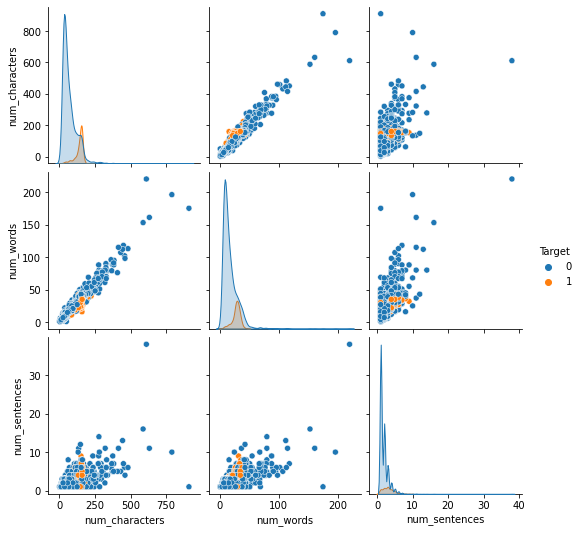

In [39]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

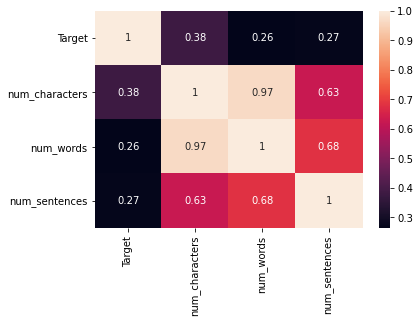

In [40]:
sns.heatmap(df.corr(),annot=True)

Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation symbols
5. Stemming: combine simpilar types of words (ex: dance,dancing,danced)

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
from nltk.corpus import stopwords


In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.stem.porter import PorterStemmer

In [46]:
ps = PorterStemmer()

In [47]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [48]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string

In [53]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [54]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep = ' '))

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [57]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9941

In [63]:
from collections import Counter
import seaborn as sns

C:\Users\siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


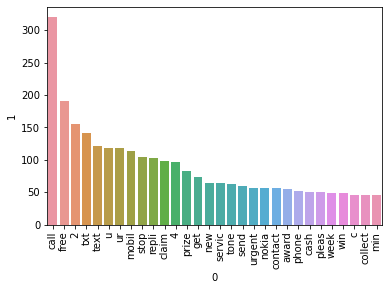

In [65]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

35303

C:\Users\siri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


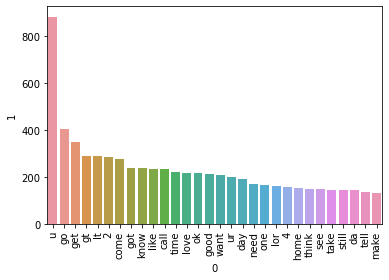

In [68]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [69]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [103]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [104]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [105]:
X.shape

(5169, 3000)

In [106]:
y = df['Target'].values

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [109]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [110]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [111]:
gnb.fit(X_train,y_train)

GaussianNB()

In [112]:
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))

0.8704061895551257
0.509090909090909
[[788 108]
 [ 26 112]]


In [113]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [114]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))

0.971953578336557
1.0
[[896   0]
 [ 29 109]]


In [ ]:
#Multinomial NaiveBayes performed Best: Tfidf and MNB

In [115]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))